In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('dataframe_cl.csv', sep = ',')
df.head()

,reservationNumber,from,passengers,rider,serviceLevel,scheduledTime,start_lt,start_lg,end_lt,end_lg,datetime,dayofweek
0,RES-Q1HKZK,"5175 South Old Peachtree Road, Norcross, GA, U...",1,585eeca79b1441f8923662ed,standard,2017-06-08T20:09:00.000Z,33.969514,-84.207254,33.979448,-84.195755,2017-06-08 20:09:00,Thursday
1,RES-Q1H68F,"2979, Lake Colony, Lake Colony Drive Northwest...",1,572763e3c9c845d866b9badc,standard,2017-06-08T20:07:00.000Z,33.930708,-84.259075,33.946081,-84.241015,2017-06-08 20:07:00,Thursday
2,RES-Q1GV1Z,"Casa Blanca Restaurant, Peachtree Industrial B...",1,591971fd7fffbb38fbdbf3a6,standard,2017-06-08T20:05:00.000Z,33.929286,-84.267367,33.944177,-84.241429,2017-06-08 20:05:00,Thursday
3,RES-Q1GCJA,"LA Fitness, Jimmy Carter Boulevard, Norcross, ...",1,573f75b7e0588bc00d12790e,standard,2017-06-08T20:04:00.000Z,33.947417,-84.241758,33.960076,-84.249217,2017-06-08 20:04:00,Thursday
4,RES-Q1G54R,"Little Caesars Pizza, Holcomb Bridge Road, Nor...",2,58dd445eb47957072ebe26ae,standard,2017-06-08T20:01:00.000Z,33.952770,-84.241511,33.952311,-84.241521,2017-06-08 20:01:00,Thursday


In [4]:
df[['start_lt', 'start_lg', 'end_lt', 'end_lg']] = df[['start_lt', 'start_lg', 'end_lt', 'end_lg']].floor(decimals = 2)

df.head()

,reservationNumber,from,passengers,rider,serviceLevel,scheduledTime,start_lt,start_lg,end_lt,end_lg,datetime,dayofweek
0,RES-Q1HKZK,"5175 South Old Peachtree Road, Norcross, GA, U...",1,585eeca79b1441f8923662ed,standard,2017-06-08T20:09:00.000Z,33.97,-84.21,33.98,-84.20,2017-06-08 20:09:00,Thursday
1,RES-Q1H68F,"2979, Lake Colony, Lake Colony Drive Northwest...",1,572763e3c9c845d866b9badc,standard,2017-06-08T20:07:00.000Z,33.93,-84.26,33.95,-84.24,2017-06-08 20:07:00,Thursday
2,RES-Q1GV1Z,"Casa Blanca Restaurant, Peachtree Industrial B...",1,591971fd7fffbb38fbdbf3a6,standard,2017-06-08T20:05:00.000Z,33.93,-84.27,33.94,-84.24,2017-06-08 20:05:00,Thursday
3,RES-Q1GCJA,"LA Fitness, Jimmy Carter Boulevard, Norcross, ...",1,573f75b7e0588bc00d12790e,standard,2017-06-08T20:04:00.000Z,33.95,-84.24,33.96,-84.25,2017-06-08 20:04:00,Thursday
4,RES-Q1G54R,"Little Caesars Pizza, Holcomb Bridge Road, Nor...",2,58dd445eb47957072ebe26ae,standard,2017-06-08T20:01:00.000Z,33.95,-84.24,33.95,-84.24,2017-06-08 20:01:00,Thursday


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'],format = '%Y-%m-%d %H:%M:%S')
df['hourofday'] = df['datetime'].dt.hour
df.head()

,reservationNumber,from,passengers,rider,serviceLevel,scheduledTime,start_lt,start_lg,end_lt,end_lg,datetime,dayofweek,hourofday
0,RES-Q1HKZK,"5175 South Old Peachtree Road, Norcross, GA, U...",1,585eeca79b1441f8923662ed,standard,2017-06-08T20:09:00.000Z,33.97,-84.21,33.98,-84.20,2017-06-08 20:09:00,Thursday,20
1,RES-Q1H68F,"2979, Lake Colony, Lake Colony Drive Northwest...",1,572763e3c9c845d866b9badc,standard,2017-06-08T20:07:00.000Z,33.93,-84.26,33.95,-84.24,2017-06-08 20:07:00,Thursday,20
2,RES-Q1GV1Z,"Casa Blanca Restaurant, Peachtree Industrial B...",1,591971fd7fffbb38fbdbf3a6,standard,2017-06-08T20:05:00.000Z,33.93,-84.27,33.94,-84.24,2017-06-08 20:05:00,Thursday,20
3,RES-Q1GCJA,"LA Fitness, Jimmy Carter Boulevard, Norcross, ...",1,573f75b7e0588bc00d12790e,standard,2017-06-08T20:04:00.000Z,33.95,-84.24,33.96,-84.25,2017-06-08 20:04:00,Thursday,20
4,RES-Q1G54R,"Little Caesars Pizza, Holcomb Bridge Road, Nor...",2,58dd445eb47957072ebe26ae,standard,2017-06-08T20:01:00.000Z,33.95,-84.24,33.95,-84.24,2017-06-08 20:01:00,Thursday,20


In [11]:
df_mon_09 = df[(df['dayofweek'] == 'Monday') & (df['hourofday'] == 9)]


(74, 13)

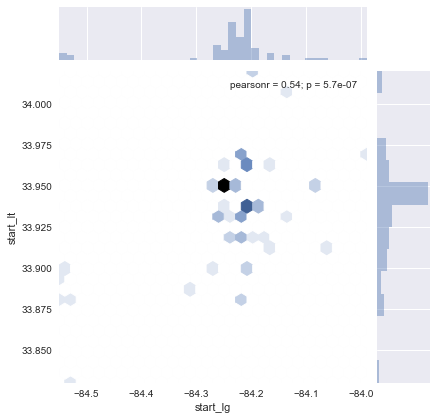

In [25]:
sns.jointplot(x=df_mon_09['start_lg'], y=df['start_lt'], kind='hex')
plt.show()

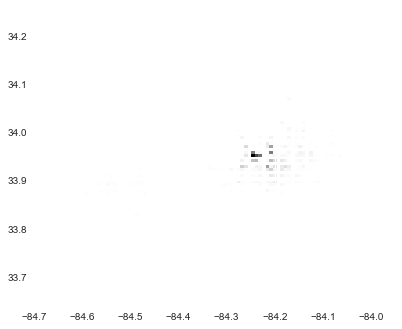

In [23]:
heatmap, xedges, yedges = np.histogram2d(df['start_lg'], df['start_lt'], bins=(100,100))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [24]:
df_mon_09['startLoc'] = df_mon_09['start_lg'].astype(str) + ', ' + df_mon_09['start_lt'].astype(str)
df_mon_09['startLoc'].value_counts()

/Users/michaelli/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-84.24, 33.95    10
-84.21, 33.96     5
-84.21, 33.94     5
-84.21, 33.97     4
-84.27, 33.93     3
-84.19, 33.94     3
-84.22, 33.92     3
-84.22, 33.93     3
-84.19, 34.02     2
-84.21, 33.9      2
-84.22, 33.88     2
-84.26, 33.95     2
-84.2, 33.94      2
-84.23, 33.95     2
-84.23, 33.92     2
-84.25, 33.95     2
-84.2, 33.92      1
-84.14, 33.93     1
-84.17, 33.96     1
-84.25, 33.96     1
-84.55, 33.89     1
-84.08, 33.95     1
-83.99, 33.97     1
-84.22, 33.95     1
-84.17, 33.92     1
-84.31, 33.89     1
-84.21, 33.93     1
-84.54, 33.88     1
-84.54, 33.9      1
-84.53, 33.83     1
-84.27, 33.9      1
-84.14, 34.01     1
-84.16, 33.91     1
-84.53, 33.88     1
-84.07, 33.91     1
-84.25, 33.94     1
-84.24, 33.93     1
-84.09, 33.95     1
Name: startLoc, dtype: int64